In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib as mpl

CB_colors = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)

In [2]:
query_size = pd.read_feather("../data/oa.feather").shape[0]
print(query_size)
df = pd.read_feather("../data/annotated_data.feather")
df.head()

1026371


,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training",...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante
0,W999667810,Modelling Stand Dynamics after Selective Loggi...,Abstract: Forest degradation and biomass damag...,2012,None,None,0.870117,0.970215,0.000000,0.010002,...,0.020004,0.010002,0.029999,0.990234,0.000000,1.000000,0.449951,0.000000,0.080017,0.790039
1,W999644455,"Mathematics, Politics, and Greenhouse Gas Inte...",While reading the newspaper one morning in spr...,2003,journal-article,https://doi.org/10.5951/mt.96.9.0646,0.979980,0.010002,0.059998,0.020004,...,0.010002,0.010002,0.939941,0.640137,0.239990,0.010002,0.779785,0.010002,0.959961,0.029999
2,W999485533,The Contribution of Rural Development Programm...,"The Health Check reform, reinforcing the Commo...",2012,book-chapter,https://doi.org/10.1007/978-3-642-22266-5_23,0.990234,0.290039,0.439941,0.010002,...,0.010002,0.020004,0.049988,0.620117,0.239990,0.010002,1.000000,0.010002,0.970215,0.189941
3,W998914803,Negotiating greenhouse abatement and the theor...,The initial qualified commitment of Annex 1 co...,1999,book-chapter,https://doi.org/10.1007/978-94-015-9169-0_3,0.990234,0.939941,0.010002,0.010002,...,0.010002,0.010002,0.979980,0.529785,0.320068,1.000000,0.010002,0.000000,0.260010,0.990234
4,W998247206,Is the introduction of a carbon tax a ‘teachab...,With the arrival of the carbon tax earlier thi...,2012,None,None,0.990234,0.979980,0.010002,0.020004,...,0.000000,0.010002,0.589844,0.439941,0.439941,0.010002,0.010002,0.010002,0.010002,0.990234


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=2, max_df=0.98)

x = vec.fit_transform(df['title'])

In [4]:
counts = x.sum(axis=1).A1
counts

array([16, 13, 13, ..., 13,  5, 13])

In [5]:
agg_vec = CountVectorizer(min_df=5, max_df=0.98,max_features=2000)

ax = agg_vec.fit_transform(df['title'])

a_counts = ax.sum(axis=1).A1

/tmp/ipykernel_214298/1817771683.py:1: RuntimeWarning: invalid value encountered in divide
  red = (counts - a_counts) / counts


(array([47634., 20251.,  9867.,  2742.,  1303.,  1278.,   521.,   316.,
          331.,   675.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

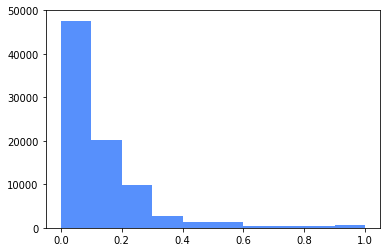

In [6]:
red = (counts - a_counts) / counts

fig, ax = plt.subplots()

ax.hist(red)

In [7]:
list(df.columns)

['id',
 'title',
 'abstract',
 'publication_year',
 'type',
 'doi',
 'INCLUDE',
 '4 - 1. Economic instruments',
 '4 - 2. Regulatory Instruments',
 '4 - 3. Information, education and training',
 '4 - 4. Governance, strategies and targets',
 '4 - 5. Agreements',
 '5 - 1.02. Carbon pricing',
 '5 - 1.02. Subsidies',
 '5 - 1.03. Non-carbon taxes',
 '5 - 1.04. Direct Investment / spending',
 '5 - 2.06. Quotas',
 '5 - 2.09. Spatial and land-use planning',
 '5 - 2.11. Standards',
 '5 - 3.15. Standardized labels, reporting and accounting standards and certification schemes',
 '5 - 4.17. Planning',
 '5 - 4.18. Government administration & management',
 '5 - 4.19. Institutions',
 '5 - 5.21. Inter/transnational agreements',
 '5 - 5.20. Inter/transnational agreements',
 '8 - 01. AFOLU',
 '8 - 02. Buildings',
 '8 - 03. Industry',
 '8 - 04. Energy',
 '8 - 05. Transport',
 '8 - 06. Waste',
 '8 - 15. Cross-sectoral',
 '10 - 3. Quantitative',
 '10 - 4. Qualitative',
 '17 - 0. Supranational and internatio

In [8]:
sectors = [
    '8 - 01. AFOLU',
    '8 - 02. Buildings',
    '8 - 03. Industry',
    '8 - 04. Energy',
    '8 - 05. Transport'
]

t = 0.5

df['sectoral'] = df[sectors].max(axis=1)
df['oecd_inclusion'] = df[['10 - 3. Quantitative','19 - 0. Ex-post','sectoral']].min(axis=1)

df.to_csv('~/Downloads/climate-policy-expost-quantitative-sectoral.csv', index=False)

In [9]:
sectors + ['10 - 3. Quantitative','19 - 0. Ex-post']

['8 - 01. AFOLU',
 '8 - 02. Buildings',
 '8 - 03. Industry',
 '8 - 04. Energy',
 '8 - 05. Transport',
 '10 - 3. Quantitative',
 '19 - 0. Ex-post']

<Axes: >

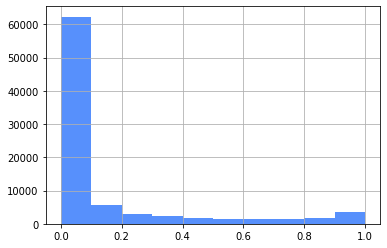

In [10]:
df['sectoral'] = df[sectors].max(axis=1)
df['inclusion'] = df[['10 - 3. Quantitative','19 - 0. Ex-post','sectoral']].min(axis=1)
df['inclusion'].hist()

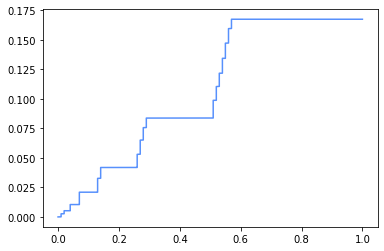

In [11]:
p = df.sort_values('inclusion').reset_index(drop=True)

fig, ax = plt.subplots()

ax.plot(p['inclusion'], p['inclusion'].cumsum()/p['inclusion'].sum())



Text(0, 0.5, 'frequency')

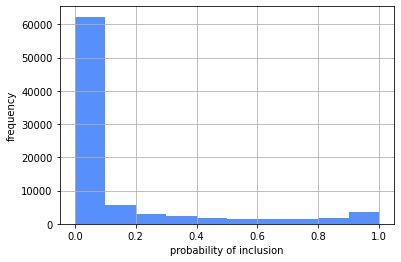

In [12]:
fig, ax = plt.subplots()
p['inclusion'].hist()
ax.set_xlabel('probability of inclusion')
ax.set_ylabel('frequency')

In [13]:
p['inclusion']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
84985    1.0
84986    1.0
84987    1.0
84988    1.0
84989    1.0
Name: inclusion, Length: 84990, dtype: float16

In [14]:
p['inclusion'].cumsum()

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
84985    2048.0
84986    2048.0
84987    2048.0
84988    2048.0
84989    2048.0
Name: inclusion, Length: 84990, dtype: float16

Text(0, 0.5, 'Expected recall')

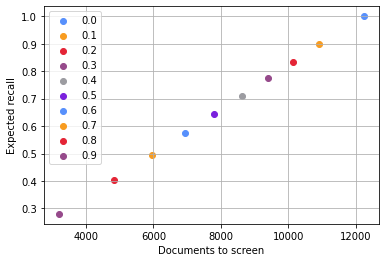

In [15]:
fig, ax = plt.subplots()
for t in np.arange(10) * 0.1:
    n = p[p['inclusion']>t]['inclusion'].sum()
    r = 1 - p[p['inclusion']<t]['inclusion'].sum() / p['inclusion'].sum()
    
    ax.scatter(n, r, label=f'{t:.1f}')
    
ax.grid()
ax.legend()
ax.set_xlabel('Documents to screen')
ax.set_ylabel('Expected recall')

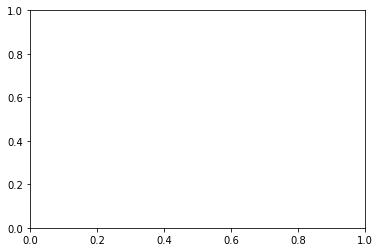

In [16]:
fig, ax = plt.subplots()

In [17]:
p['inclusion'].sum()

12240.0

In [18]:
seen_df = pd.read_csv("../data/0_labelled_documents.csv")
seen_df.head()

,id,title,content,0 - relevant,10 - 3. Quantitative,10 - 4. Qualitative,2 - 0. Mitigation,2 - 1. Adaptation,3 - 0. Not policy related,3 - 1. Analysis of an existing policy / concrete proposal,...,5 - 2.05. Trade restrictions,5 – 4.17. Government administration & management,5 - 4.17. Government administration & management,representative_sample,representative_relevant,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante
0,156,THE EXPECTED GREENHOUSE BENEFITS FROM DEVELOPI...,Magma power is the production of electricity f...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
1,337,Energy forecast till 2020 for the German Gover...,A study conducted by the Prognos economic rese...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
2,921,Ontology engineering in provenance enablement ...,The National Climate Assessment of the U.S. Gl...,1.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
3,1448,"Planning, governance and rural futures in Aust...",Rural regions in post-industrial countries con...,1.0,NaN,NaN,0.0,1.0,0.0,0.0,...,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
4,3556,Will economic restructuring in China reduce tr...,We calculate carbon dioxide (CO2) emissions em...,1.0,1.0,1.0,1.0,0.0,0.0,2.0,...,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0


In [19]:
places = pd.read_feather("../data/places.feather")
places

,feature_code,feature_class,country_code3,lat,lon,name,admin1_code,admin1_name,admin2_code,admin2_name,...,search_name,start_char,end_char,city_id,city_name,doc_id,country_conf,place_name,continent,word
0,PCLI,A,CMR,6.00000,12.50000,Republic of Cameroon,00,None,None,None,...,Cameroon,547.0,555.0,None,None,W999667810,NaN,None,Africa,None
1,PCLI,A,ITA,42.83333,12.83333,Italian Republic,00,None,None,None,...,Italy,91.0,96.0,None,None,W999485533,NaN,None,Europe,None
2,PCLI,A,ITA,42.83333,12.83333,Italian Republic,00,None,None,None,...,Italy,845.0,850.0,None,None,W999485533,NaN,None,Europe,None
3,PCLI,A,MAR,28.50000,-10.00000,Kingdom of Morocco,00,None,None,None,...,Morocco,122.0,129.0,None,None,W998175845,NaN,None,Africa,None
4,PCLI,A,MAR,28.50000,-10.00000,Kingdom of Morocco,00,None,None,None,...,Morocco,203.0,210.0,None,None,W998175845,NaN,None,Africa,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291924,PCLI,A,SGP,NaN,NaN,None,None,None,None,None,...,None,NaN,NaN,None,None,W1829013783,0.95,None,None,Singapore
291925,PCLI,A,THA,NaN,NaN,None,None,None,None,None,...,None,NaN,NaN,None,None,W1792873183,0.95,None,None,Thai
291926,PCLI,A,USA,NaN,NaN,None,None,None,None,None,...,None,NaN,NaN,None,None,W1787557359,0.95,None,None,United States
291927,PCLI,A,DNK,NaN,NaN,None,None,None,None,None,...,None,NaN,NaN,None,None,W1597992701,0.95,None,None,Danish


<BarContainer object of 33 artists>

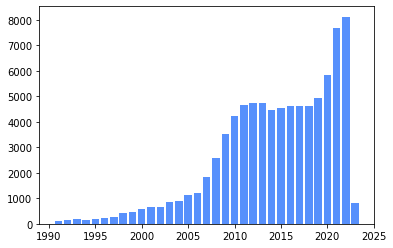

In [20]:
fig, ax = plt.subplots()

totals = df[df["publication_year"]>1990].groupby("publication_year")["id"].nunique()
ax.bar(totals.index, totals)

[Text(0, 0, 'report'),
 Text(0, 1, 'book'),
 Text(0, 2, 'other'),
 Text(0, 3, 'dissertation'),
 Text(0, 4, 'proceedings-article'),
 Text(0, 5, 'book-chapter'),
 Text(0, 6, 'posted-content'),
 Text(0, 7, 'unknown'),
 Text(0, 8, 'journal-article')]

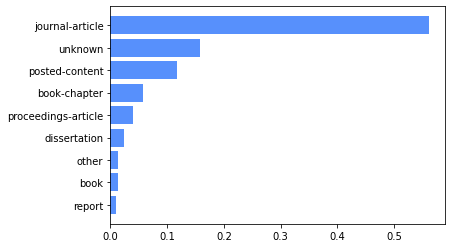

In [21]:
df.loc[pd.isna(df['type']),'type'] = 'unknown'
pub_types = df.groupby('type')['id'].nunique().sort_values(ascending=False).to_frame('n').reset_index()
uncommon_types = pub_types.loc[pub_types['n']<500,'type']
df.loc[df['type'].isin(uncommon_types),'type'] = 'other'
pub_types = df.groupby('type')['id'].nunique().sort_values().to_frame('n').reset_index()
pub_types['share'] = pub_types['n'] / df.shape[0]
fig, ax = plt.subplots()
ax.barh(pub_types.index, pub_types['share'])
ax.set_yticks(pub_types.index)
ax.set_yticklabels(pub_types['type'])

In [22]:
df['peer_reviewed'] = 0
df.loc[df['type']=='journal-article','peer_reviewed'] = 1

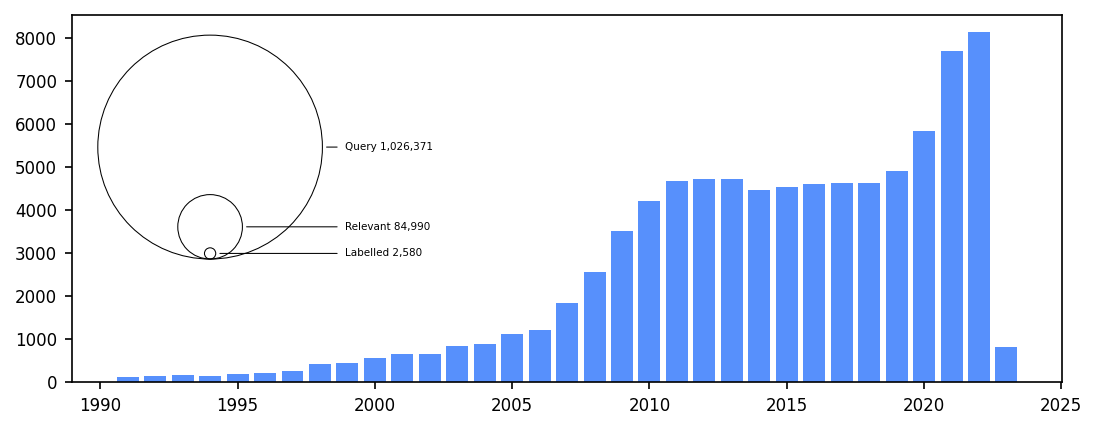

In [23]:
import math
from matplotlib.patches import Circle

def draw_circle(label, size, max_size, ax, max_r=None, ytop=False, dotted=False, bounds="",label_offset=1.18):
    r = math.sqrt(size/max_size/math.pi)
    lw = 0.5
    if dotted:
        ls = "--"
    else:
        ls = "-"
    if max_r is None:
        max_r = r
        y = 0.5
    else:
        y = 0.5-(max_r-r)
    circle = Circle(
        (0.5,y), r,
        color="None",
        ec="black",
        lw=lw,
        ls=ls,
        clip_on=False
    )
    ax.add_patch(circle)
    if ytop:
        ylab = y+r
        xlab = 0.5
    else:
        ylab = y
        xlab = 0.5+r
    if label:
        ax.annotate(
            f"{label} {size:,} {bounds}", (xlab,ylab), (label_offset,ylab), 
            arrowprops={"arrowstyle": "-",  "linewidth":0.5}, va="center",
            fontsize=5, annotation_clip=False
        )
    return r

fig = plt.figure(figsize=(7.2,5.2), dpi=150, constrained_layout=True)
gs = fig.add_gridspec(6, 6)

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
# })

#########################
## Time+uncertainty
ax = plt.subplot(gs[:3,0:])
totals = df[df["publication_year"]>1990].groupby("publication_year")["id"].nunique()
ax.bar(totals.index, totals)
ax.tick_params(axis='both', which='both', labelsize=8)

####################
## 
# Inset axis 
ax = ax.inset_axes([0.05,0.4,0.32,0.6])
fill_cols = ["None"] * 4

relevant = df.shape[0]
seen = seen_df.shape[0]
    
#Query docs
max_r = draw_circle("Query", query_size, query_size, ax )
r = draw_circle("Relevant", relevant, query_size, ax, max_r)
r = draw_circle("Labelled", seen, query_size, ax, max_r)


ax.axis('equal')
ax.axis('off')
ax.set_xlim(xmin=0.4, xmax=1.3)
ax.set_ylim(ymin=0.1)



plt.savefig("../figures/numbers_time.pdf", bbox_inches="tight")

In [24]:
tdf = pd.DataFrame.from_dict(totals)
#tdf = 
tdf

,id
publication_year,
1991,116
1992,149
1993,180
1994,158
1995,191
1996,214
1997,259
1998,419
1999,454


In [25]:
since_2020 = df[df["publication_year"]>=2020].shape[0] / df.shape[0]

In [26]:
with open("../results/n_papers.tex","w") as f:
    f.write(f"{relevant:,}")
    
with open("../results/query_papers.tex","w") as f:
    f.write(f"{query_size:,}")
    
with open("../results/screened_papers.tex","w") as f:
    f.write(f"{seen:,}")

with open("../results/since_2020.tex","w") as f:
    f.write(f"{since_2020:.0%}".replace("%","\%"))

## Instruments

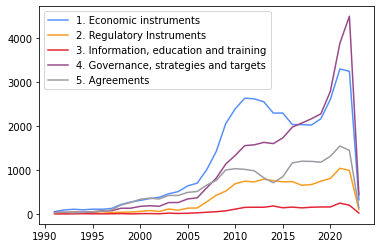

In [27]:
import re
instruments = [x for x in df.columns if re.match("^4 -",x)]
instrument_labels = [x.split('.')[1].split()[0].replace(',','') for x in instruments]
fig, ax = plt.subplots()
for c in instruments:
    n = df[df["publication_year"]>1990].round().groupby("publication_year")[c].sum()
    ax.plot(n, label=c.split(" - ")[1])
    
ax.legend()

plt.savefig("../figures/instrument_types.pdf", bbox_inches="tight")

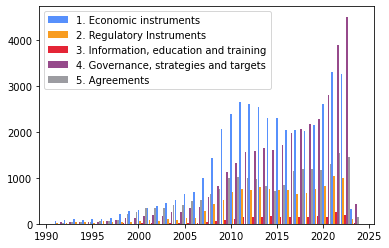

In [28]:
fig, ax = plt.subplots()
totals = np.zeros((n.shape[0],len(instruments)))

def count_rel(x):
    return x[x>=0.5].shape[0]

for i,c in enumerate(instruments):
    n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
    
    py_index = n.index
    ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
    totals[:,i] = n.values
    
ax.legend()


In [29]:
py_index[np.argwhere(totals[:,3] > totals[:,0])[0][0]]

2017

In [67]:
gov_22 = df[
    (df["publication_year"]==2022) & 
    (df["4 - 4. Governance, strategies and targets"]>=0.5)
].shape[0]
print(gov_22)
with open("../results/governance_22.tex", "w") as f:
    f.write(f"{gov_22:,}")

4518


In [68]:
econ_22 = df[
    (df["publication_year"]==2022) & 
    (df["4 - 1. Economic instruments"]>=0.5)
].shape[0]
print(econ_22)
with open("../results/econ_22.tex", "w") as f:
    f.write(f"{econ_22:,}")

3263


In [70]:
tot_22 = df[df["publication_year"]==2022].shape[0]
print(tot_22)
with open("../results/total_22.tex", "w") as f:
    f.write(f"{tot_22:,}")

8120


In [33]:
gov_22_papers = df[
    (df["publication_year"]==2022) & 
    (df["4 - 4. Governance, strategies and targets"]>=0.5)
]
print(gov_22)
ngi = [x for x in instruments if "Governance" not in x and "Agreements" not in x]
for i in ngi:
    print(i)
    ig = gov_22_papers[gov_22_papers[i]>=0.5].shape[0] / gov_22
    print(f'{ig:.0%}')
    il = i.split('. ')[1].split()[0].strip()
    with open(f"../results/gov_{il}_22.tex", "w") as f:
        f.write(f"{ig:.0%}".replace('%','\%'))

4518
4 - 1. Economic instruments
13%
4 - 2. Regulatory Instruments
7%
4 - 3. Information, education and training
1%


In [34]:
og = (gov_22_papers[ngi].max(axis=1)<0.5).sum() / gov_22
print(f'{og:.0%}')
with open("../results/gov_only.tex", "w") as f:
    f.write(f"{og:.0%}".replace('%','\%'))

80%


In [35]:
# How many governance studies are on planning

MODEL = "climatebert"
y_prefix = "INCLUDE"

cols = [x for x in seen_df.columns if re.match(y_prefix, x)]

include_ids = np.load(f"../cluster-experiments/cv_results/{MODEL}__INCLUDE__relevant_ids.npy", allow_pickle=True)

y_prefix = "5 -"
MODEL = "climatebert"
min_samples=15
pred = np.load(f"../cluster-experiments/cv_results/{MODEL}__{y_prefix}__predictions.npy")
ids = np.load(f"../cluster-experiments/cv_results/{MODEL}__{y_prefix}__ids.npy", allow_pickle=True)
cols = [x for x in seen_df.columns if re.match(y_prefix, x)]
cols = [x for x in cols if seen_df[x].sum()>min_samples]
pred_df = pd.DataFrame({"id": ids})
for i, cname in enumerate(cols):
    pred_df[cname]=pred[:,i]
    
pred_df = pred_df[pred_df["id"].isin(include_ids)].reset_index(drop=True)
pred_df

,id,5 - 1.02. Carbon pricing,5 - 1.02. Subsidies,5 - 1.03. Non-carbon taxes,5 - 1.04. Direct Investment / spending,5 - 2.06. Quotas,5 - 2.09. Spatial and land-use planning,5 - 2.11. Standards,"5 - 3.15. Standardized labels, reporting and accounting standards and certification schemes",5 - 4.17. Planning,5 - 4.18. Government administration & management,5 - 4.19. Institutions,5 - 5.21. Inter/transnational agreements,5 - 5.20. Inter/transnational agreements
0,W999667810,0.012244,0.890681,0.012638,0.044177,0.019791,0.008147,0.017411,0.004547,0.006801,0.050853,0.019084,0.029153,0.007997
1,W999644455,0.002257,0.015727,0.006955,0.268905,0.007732,0.026731,0.011716,0.009537,0.004550,0.888238,0.025649,0.320711,0.031066
2,W999485533,0.006306,0.806235,0.126574,0.787764,0.117880,0.221127,0.038325,0.084293,0.048973,0.913907,0.196883,0.681759,0.022835
3,W998914803,0.961037,0.012400,0.014444,0.053812,0.020454,0.006061,0.021157,0.015806,0.022974,0.104004,0.004783,0.051580,0.989796
4,W998247206,0.983366,0.007339,0.016406,0.018986,0.008082,0.002247,0.009882,0.010583,0.002792,0.021396,0.002604,0.003529,0.009451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84205,W1001986490,0.434372,0.005622,0.004617,0.018507,0.016534,0.001999,0.033819,0.005999,0.013661,0.004610,0.002817,0.007937,0.052288
84206,W100136754,0.986470,0.087475,0.022168,0.034244,0.080874,0.004781,0.091803,0.019433,0.019245,0.005328,0.004591,0.009792,0.038410
84207,W1001294588,0.034915,0.011792,0.028041,0.013984,0.034141,0.010773,0.426579,0.015013,0.020882,0.022041,0.013831,0.005337,0.006115
84208,W1000733675,0.013346,0.025550,0.017525,0.054766,0.023760,0.007131,0.055547,0.015752,0.016251,0.013080,0.013395,0.012869,0.008537


In [36]:
gov_cols = [x for x in pred_df.columns if "5 - 4" in x]
print(gov_cols)
for c in gov_cols:
    print(c)
    print(pred_df[pred_df[c]>=0.5].shape)

['5 - 4.17. Planning', '5 - 4.18. Government administration & management', '5 - 4.19. Institutions']
5 - 4.17. Planning
(680, 14)
5 - 4.18. Government administration & management
(32747, 14)
5 - 4.19. Institutions
(115, 14)


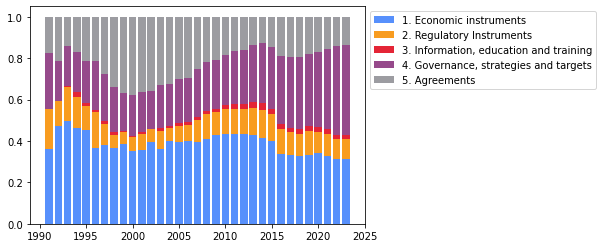

In [37]:
fig, ax = plt.subplots()
bottom = np.zeros(totals.shape[0])
for i,c in enumerate(instruments):
    n = totals[:,i]/totals.sum(axis=1)
    ax.bar(py_index, n, bottom=bottom, label=c.split(" - ")[1])
    bottom += n
    
ax.legend(bbox_to_anchor=(1,1))

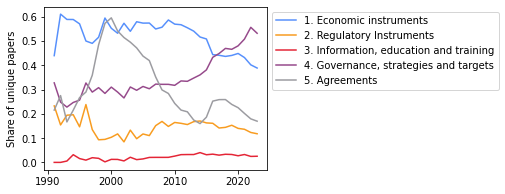

In [38]:
fig, ax = plt.subplots(figsize=(4,3))
for i,c in enumerate(instruments):
    n = totals[:,i]/tdf['id']
    ax.plot(py_index, n, label=c.split(" - ")[1])
    
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Share of unique papers')
plt.savefig('../figures/instrument_share_time.pdf',bbox_inches='tight')

In [39]:
totals.shape

(33, 5)

In [40]:
for c in instruments:
    sc = c.split(".")[1].strip().split()[0].split(",")[0]
    print(sc)
    with open(f"../results/{sc}_total.tex","w") as f:
        f.write(f"{int(df.round()[c].sum()):,}")

Economic
Regulatory
Information
Governance
Agreements


In [41]:
f"{int(df.round()[c].sum()):,}"

'20,736'

## Sectors

<Axes: >

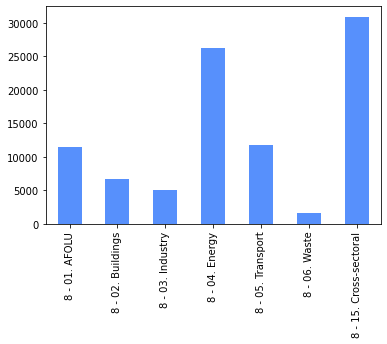

In [42]:
sectors = [x for x in df.columns if re.match("^8 -",x)]
sector_labels = [x.split(" - ")[1].split(". ")[1] for x in sectors]
df[sectors].replace(2,1).round().sum().plot.bar()

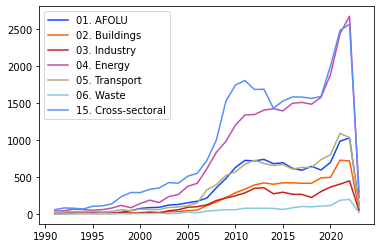

In [43]:
CB_8 = ["#1845fb", "#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#578dff", "#656364"]

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_8)

fig, ax = plt.subplots()
for c in sectors:
    n = df[df["publication_year"]>1990].round().groupby("publication_year")[c].sum()
    ax.plot(n, label=c.split(" - ")[1])
    
ax.legend()

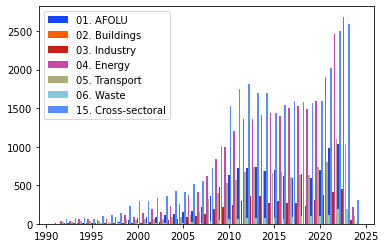

In [44]:
fig, ax = plt.subplots()
totals = np.zeros((n.shape[0],len(sectors)))

def count_rel(x):
    return x[x>=0.5].shape[0]

for i,c in enumerate(sectors):
    n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
    
    py_index = n.index
    ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
    totals[:,i] = n.values
    
ax.legend()

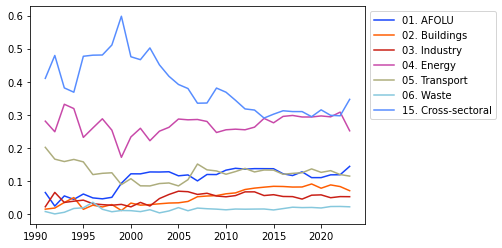

In [45]:
fig, ax = plt.subplots()
for i,c in enumerate(sectors):
    n = totals[:,i]/totals.sum(axis=1)
    ax.plot(py_index, n, label=c.split(" - ")[1])
    
ax.legend(bbox_to_anchor=(1,1))

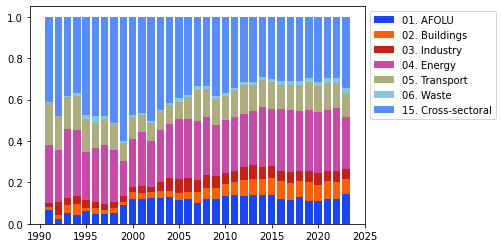

In [46]:
fig, ax = plt.subplots()
bottom = np.zeros(totals.shape[0])
for i,c in enumerate(sectors):
    n = totals[:,i]/totals.sum(axis=1)
    ax.bar(py_index, n, bottom=bottom, label=c.split(" - ")[1])
    bottom += n
    
ax.legend(bbox_to_anchor=(1,1))

In [47]:

m = np.zeros((len(sectors),len(instruments)))

for i, sector in enumerate(sectors):
    for j, instrument in enumerate(instruments):
        m[i,j] = df[(df[sector]>=0.5) & (df[instrument]>=0.5)].shape[0]
        

In [59]:
df['ctype'] = df['type'].copy()
df.loc[pd.isna(df['type']),'ctype'] = 'unknown'
all_types = df.groupby('type')['id'].count().sort_values(ascending=False) / df.shape[0]
min_prop = 0.02
df.loc[df['type'].isin(all_types[all_types<min_prop].index),'ctype'] = 'other'
types = df.groupby('ctype')['id'].count().sort_values(ascending=False) / df.shape[0]
types

ctype
journal-article        0.564537
unknown                0.158736
posted-content         0.118179
book-chapter           0.057760
proceedings-article    0.039110
other                  0.037875
dissertation           0.023803
Name: id, dtype: float64

In [60]:
all_types

type
journal-article        0.564537
unknown                0.158736
posted-content         0.118179
book-chapter           0.057760
proceedings-article    0.039110
dissertation           0.023803
other                  0.014131
book                   0.013507
report                 0.010236
Name: id, dtype: float64

In [64]:
df['type'] = pd.Categorical(df['type'], categories=all_types.index)

/tmp/ipykernel_214298/961175910.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby('type'):
/tmp/ipykernel_214298/961175910.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby('type'):


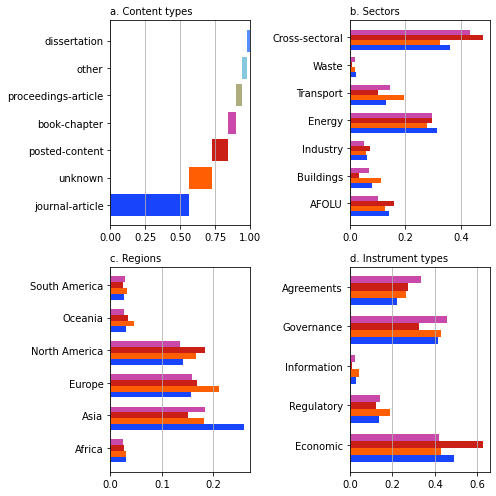

In [66]:


import matplotlib.gridspec as gridspec

ts = 10

fig = plt.figure(tight_layout=True, figsize=(7,7))
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, 0])
colors = [f'C{i}' for i,x in enumerate(types.values)]
ax.barh(
    types.index, types.values, 
    left=types.shift(1).cumsum().fillna(0),
    color=colors
)
ax.set_xlim(xmax=1)
ax.grid(axis='x')
ax.set_title('a. Content types', fontsize=ts, loc='left')


min_prop = 0.05
w = 0.18
offset = w*2

def plot_shares(ax, x, xlabels, min_prop, w, offset):
    for i, c in enumerate(x):
        j = 0
        for name, group in df.groupby('type'):
            if group.shape[0] / df.shape[0] < min_prop:
                continue
            s = group[group[c]>=0.5].shape[0] / group.shape[0]
            ax.barh(
                i-offset+j*w,s, label=name if i==0 else None,
                color=f'C{j}',
                height=w
            )
            j+=1
        ax.grid(axis='x')

    ax.set_yticks(range(len(x)))
    ax.set_yticklabels(xlabels)
    
ax = fig.add_subplot(gs[0,1])
ax.set_title('b. Sectors', fontsize=ts, loc='left')
plot_shares(ax, sectors, sector_labels, min_prop, w, offset)

ax = fig.add_subplot(gs[1,1])
ax.set_title('d. Instrument types', fontsize=ts, loc='left')
plot_shares(ax, instruments, instrument_labels, min_prop, w, offset)

ax = fig.add_subplot(gs[1,0])
regions = []

for i, (rname, rgroup) in enumerate(places.groupby('continent')):
    regions.append(rname)
    j = 0
    for name, group in df.groupby('type'):
        if group.shape[0] / df.shape[0] < min_prop:
            continue
        s = group[group['id'].isin(rgroup['doc_id'])].shape[0] / group.shape[0]
        ax.barh(
            i-offset+j*w,s, label=name if i==0 else None,
            color=f'C{j}',
            height=w
        )
        j+= 1

ax.set_yticks(range(len(regions)))
ax.set_yticklabels(regions)
ax.grid(axis='x')
ax.set_title('c. Regions', size=ts, loc='left')
#ax.legend()

plt.savefig('../figures/content-types.pdf', bbox_inches='tight')

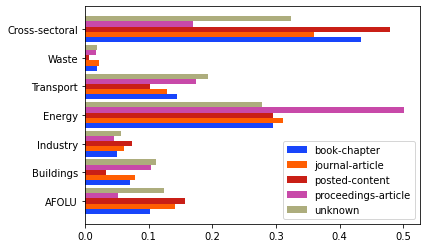

In [50]:
fig, ax = plt.subplots()

min_prop = 0.025
w = 0.18
offset = w*2

for i, sector in enumerate(sectors):
    j = 0
    for name, group in df.groupby('type'):
        if group.shape[0] / df.shape[0] < min_prop:
            continue
        s = group[group[sector]>=0.5].shape[0] / group.shape[0]
        ax.barh(
            i-offset+j*w,s, label=name if i==0 else None,
            color=f'C{j}',
            height=w
        )
        j+=1
        
ax.set_yticks(range(len(sector_labels)))
ax.set_yticklabels(sector_labels)
        
ax.legend()

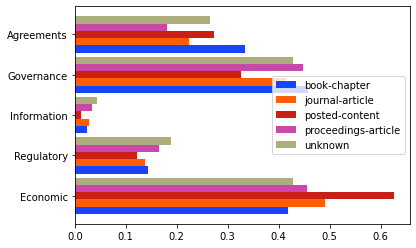

In [51]:
fig, ax = plt.subplots()

w = 0.18
offset = w*2

for i, sector in enumerate(instruments):
    j = 0
    for name, group in df.groupby('type'):
        if group.shape[0] < 3000:
            continue
        s = group[group[sector]>=0.5].shape[0] / group.shape[0]
        ax.barh(
            i-offset+j*w,s, label=name if i==0 else None,
            color=f'C{j}',
            height=w
        )
        j+=1
        
ax.set_yticks(range(len(instrument_labels)))
ax.set_yticklabels(instrument_labels)
        
ax.legend()

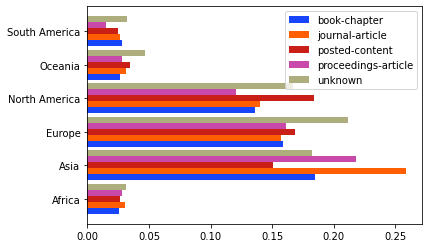

In [52]:
fig, ax = plt.subplots()

w = 0.18
offset = w*2

regions = []

for i, (rname, rgroup) in enumerate(places.groupby('continent')):
    regions.append(rname)
    j = 0
    for name, group in df.groupby('type'):
        if group.shape[0] < 3000:
            continue
        s = group[group['id'].isin(rgroup['doc_id'])].shape[0] / group.shape[0]
        ax.barh(
            i-offset+j*w,s, label=name if i==0 else None,
            color=f'C{j}',
            height=w
        )
        j+= 1

ax.set_yticks(range(len(regions)))
ax.set_yticklabels(regions)
ax.legend()

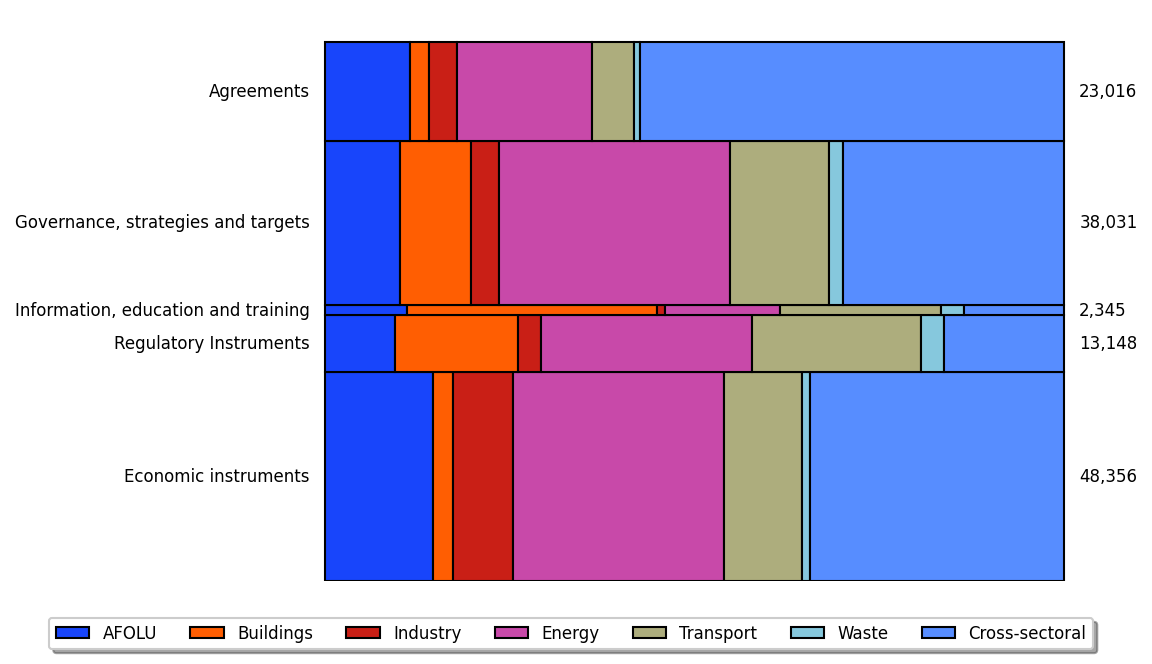

In [53]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
l = 0

fs = 8

for i, instrument in enumerate(instruments):
    b = 0
    h = m[:,i].sum()
    for j, sector in enumerate(sectors):
        w = m[j,i]/m[:,i].sum()
        ax.bar(
            x=b, bottom=l, height=m[:,i].sum(), width=w, 
            align="edge", color=f"C{j}", label=sector.split()[3] if i==0 else None,
            ec="black"
        )
        if i==len(instruments):
            yoffset = 1.13-0.05*(j%3)
            yoffset = 1.03+0.05*(j%2)
            ax.annotate(
                sector.split()[3],
                (b+w/2,l+h),
                (b+w/2,(l+h)*yoffset),
                arrowprops=dict(arrowstyle="->"),
                ha="center",
                va="center"
            )
            print(yoffset)
        b+=w
    ax.text(-.02, l+h/2, instrument.split(" - ")[1].split(". ")[1], va="center", ha="right", fontsize=fs)
    ax.text(1.02, l+h/2, f"{h:,.0f}", ha="left", va="center", fontsize=fs)
    l+=m[:,i].sum()
    
    
ax.legend(bbox_to_anchor=(1.0, -0.05),
          fancybox=True, shadow=True, ncol=7, fontsize=fs)
ax.spines[['right', 'top','bottom']].set_visible(False)
ax.set_xticks([])
ax.axis("off")

plt.savefig("../figures/instruments_sectors.png", bbox_inches="tight")
plt.savefig("../figures/instruments_sectors.pdf", bbox_inches="tight")

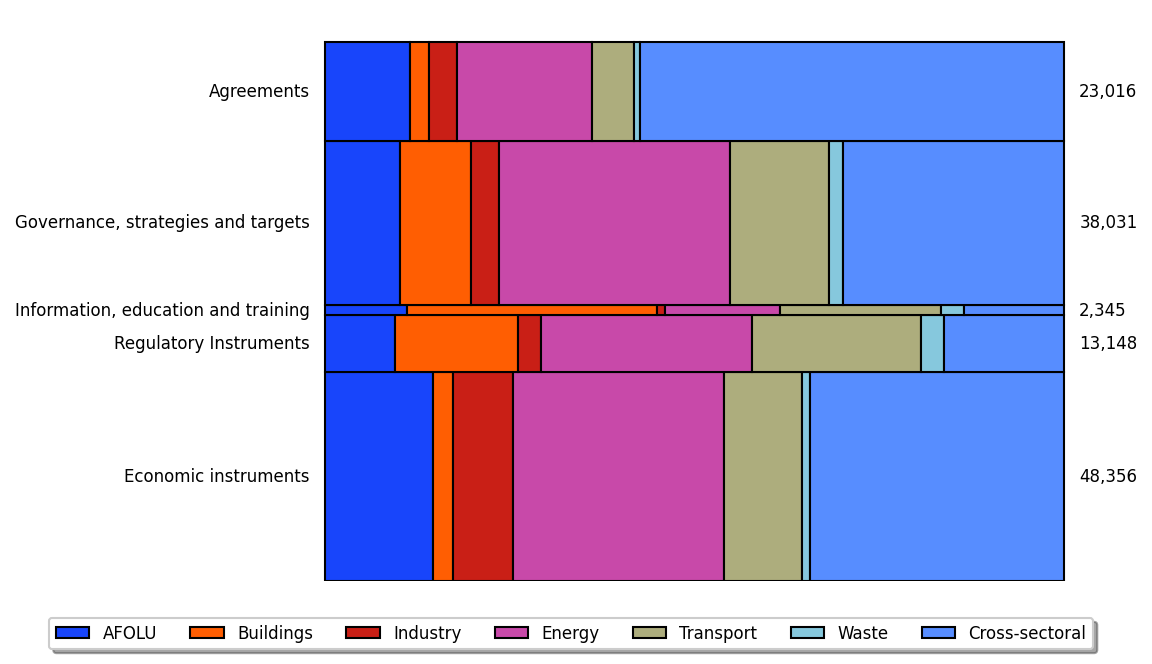

In [54]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
l = 0

fs = 8

for i, instrument in enumerate(instruments):
    b = 0
    h = m[:,i].sum()
    for j, sector in enumerate(sectors):
        w = m[j,i]/m[:,i].sum()
        ax.bar(
            x=b, bottom=l, height=m[:,i].sum(), width=w, 
            align="edge", color=f"C{j}", label=sector.split()[3] if i==0 else None,
            ec="black"
        )
        if i==len(instruments):
            yoffset = 1.13-0.05*(j%3)
            yoffset = 1.03+0.05*(j%2)
            ax.annotate(
                sector.split()[3],
                (b+w/2,l+h),
                (b+w/2,(l+h)*yoffset),
                arrowprops=dict(arrowstyle="->"),
                ha="center",
                va="center"
            )
            print(yoffset)
        b+=w
    ax.text(-.02, l+h/2, instrument.split(" - ")[1].split(". ")[1], va="center", ha="right", fontsize=fs)
    ax.text(1.02, l+h/2, f"{h:,.0f}", ha="left", va="center", fontsize=fs)
    l+=m[:,i].sum()
    
    
ax.legend(bbox_to_anchor=(1.0, -0.05),
          fancybox=True, shadow=True, ncol=7, fontsize=fs)
ax.spines[['right', 'top','bottom']].set_visible(False)
ax.set_xticks([])
ax.axis("off")

plt.savefig("../figures/instruments_sectors_pr.png", bbox_inches="tight")
plt.savefig("../figures/instruments_sectors_pr.pdf", bbox_inches="tight")

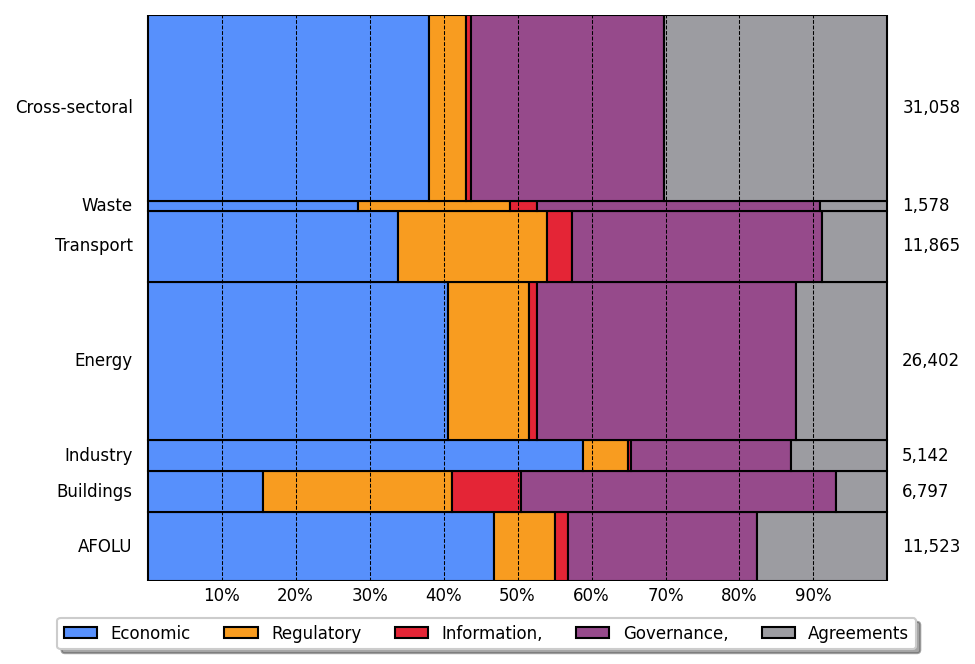

In [55]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)
l = 0

fs = 8

for i, sector in enumerate(sectors):
    b = 0
    
    h = df[df[sector]>=0.5].shape[0]
    sum_mentions = m[i,:].sum()
    for j, instrument in enumerate(instruments):
        w = m[i,j]/sum_mentions
        ax.bar(
            x=b, bottom=l, height=h, width=w, 
            align="edge", color=f"C{j}", label=instrument.split()[3] if i==0 else None,
            ec="black"
        )
        if i==len(sectors):
            yoffset = 1.13-0.05*(j%3)
            yoffset = 1.03+0.05*(j%2)
            ax.annotate(
                instrument.split()[3],
                (b+w/2,l+h),
                (b+w/2,(l+h)*yoffset),
                arrowprops=dict(arrowstyle="->"),
                ha="center",
                va="center"
            )
            print(yoffset)
        b+=w
    ax.text(-.02, l+h/2, sector.split(" - ")[1].split(". ")[1], va="center", ha="right", fontsize=fs)
    ax.text(1.02, l+h/2, f"{h:,.0f}", ha="left", va="center", fontsize=fs)
    l+=h
    
ax.set_ylim(ymax=l)
    
    
ax.legend(bbox_to_anchor=(1.0, -0.05),
          fancybox=True, shadow=True, ncol=7, fontsize=fs)
ax.spines[['right', 'top','bottom']].set_visible(False)
#ax.set_xticks([])
ax.axis("off")

for i in range(1,10):
    ax.axvline(
        i*0.1, lw=0.5, color='black', ls='--'
    )
    ax.text(
        i*0.1,-l*0.01,f'{i*0.1:.0%}', ha="center", va="top", fontsize=8,
        
    )

plt.savefig("../figures/sectors_instruments.png", bbox_inches="tight")
plt.savefig("../figures/sectors_instruments.pdf", bbox_inches="tight")

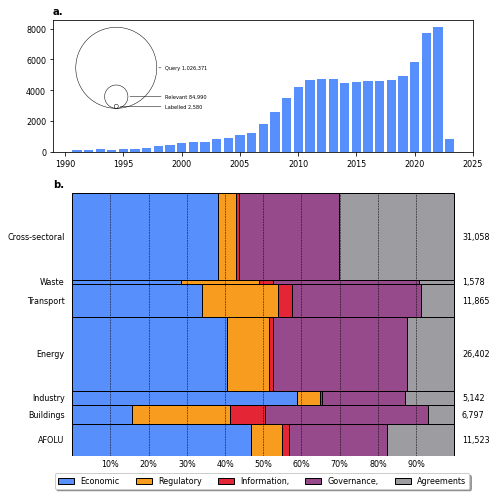

In [56]:
## Figure 1

fig = plt.figure(tight_layout=True, figsize=(7,7))
gs = gridspec.GridSpec(2, 1, height_ratios = [1,2])

ax = fig.add_subplot(gs[0,0])
totals = df[df["publication_year"]>1990].groupby("publication_year")["id"].nunique()
ax.bar(totals.index, totals)
ax.tick_params(axis='both', which='both', labelsize=8)
ax.set_title('a.', loc='left', fontsize=ts, fontweight="bold")

####################
## 
# Inset axis 
ax = ax.inset_axes([0.05,0.4,0.32,0.6])
fill_cols = ["None"] * 4

relevant = df.shape[0]
seen = seen_df.shape[0]
    
#Query docs
max_r = draw_circle("Query", query_size, query_size, ax )
r = draw_circle("Relevant", relevant, query_size, ax, max_r)
r = draw_circle("Labelled", seen, query_size, ax, max_r)


ax.axis('equal')
ax.axis('off')
ax.set_xlim(xmin=0.4, xmax=1.3)
ax.set_ylim(ymin=0.1)

ax = fig.add_subplot(gs[1,0])

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)
l = 0

fs = 8

for i, sector in enumerate(sectors):
    b = 0
    
    h = df[df[sector]>=0.5].shape[0]
    sum_mentions = m[i,:].sum()
    for j, instrument in enumerate(instruments):
        w = m[i,j]/sum_mentions
        ax.bar(
            x=b, bottom=l, height=h, width=w, 
            align="edge", color=f"C{j}", label=instrument.split()[3] if i==0 else None,
            ec="black"
        )
        if i==len(sectors):
            yoffset = 1.13-0.05*(j%3)
            yoffset = 1.03+0.05*(j%2)
            ax.annotate(
                instrument.split()[3],
                (b+w/2,l+h),
                (b+w/2,(l+h)*yoffset),
                arrowprops=dict(arrowstyle="->"),
                ha="center",
                va="center"
            )
            print(yoffset)
        b+=w
    ax.text(-.02, l+h/2, sector.split(" - ")[1].split(". ")[1], va="center", ha="right", fontsize=fs)
    ax.text(1.02, l+h/2, f"{h:,.0f}", ha="left", va="center", fontsize=fs)
    l+=h
    
ax.set_ylim(ymax=l)
    
    
ax.legend(bbox_to_anchor=(1.0, -0.05),
          fancybox=True, shadow=True, ncol=7, fontsize=fs)
ax.spines[['right', 'top','bottom']].set_visible(False)
#ax.set_xticks([])
ax.axis("off")

ax.set_title('b.', loc='left', fontsize=ts, fontweight="bold")

for i in range(1,10):
    ax.axvline(
        i*0.1, lw=0.5, color='black', ls='--'
    )
    ax.text(
        i*0.1,-l*0.01,f'{i*0.1:.0%}', ha="center", va="top", fontsize=8,
        
    )
    
plt.savefig("../figures/Figure_2.pdf", bbox_inches="tight")


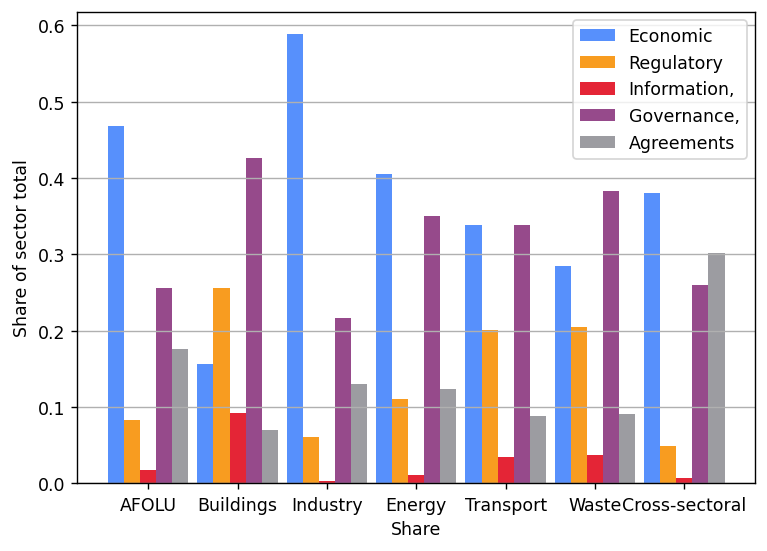

In [57]:
fig, ax = plt.subplots(figsize=(7,5), dpi=125)


w = 0.18
offset = w*2



for i, sector in enumerate(sectors):
    b = 0
    
    h = df[df[sector]>=0.5].shape[0]
    sum_mentions = m[i,:].sum()
    for j, instrument in enumerate(instruments):
        share = m[i,j]/sum_mentions
        ax.bar(i-offset+j*w, share, width=w,
              color=f"C{j}", label=instrument.split()[3] if i==0 else None,
            )
        
ax.set_xticks(range(len(sectors)))
ax.set_xticklabels(sector_labels)

ax.set_ylabel('Share of sector total')
ax.set_xlabel('Share')

ax.legend()

ax.grid(axis='y')

plt.savefig("../figures/sectors_instruments_grouped.png", bbox_inches="tight")
plt.savefig("../figures/sectors_instruments_grouped.pdf", bbox_inches="tight")

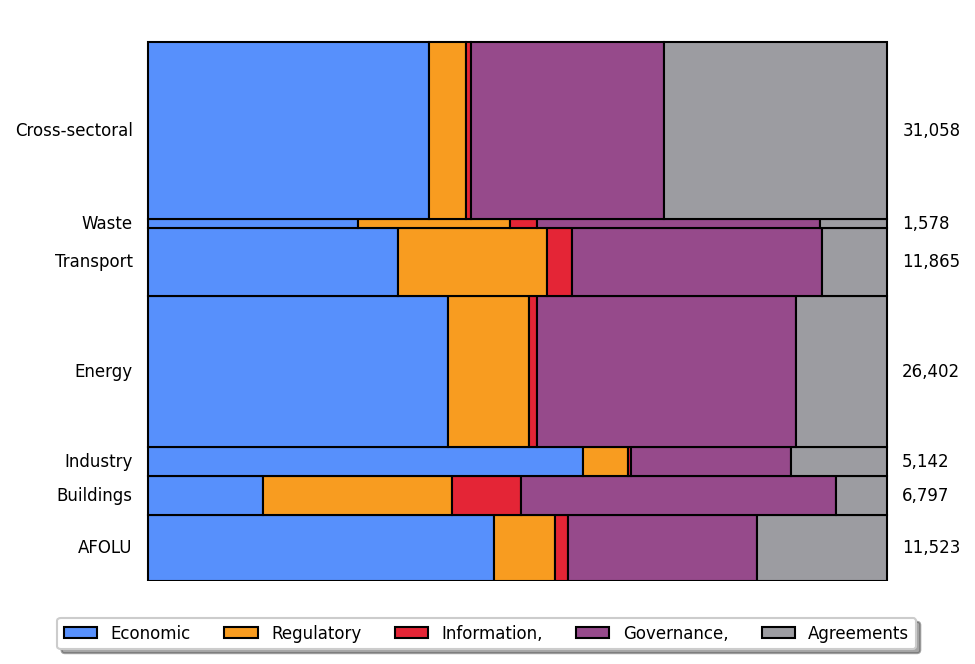

In [58]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
l = 0

fs = 8

for i, sector in enumerate(sectors):
    b = 0
    
    h = df[df[sector]>=0.5].shape[0]
    sum_mentions = m[i,:].sum()
    for j, instrument in enumerate(instruments):
        w = m[i,j]/sum_mentions
        ax.bar(
            x=b, bottom=l, height=h, width=w, 
            align="edge", color=f"C{j}", label=instrument.split()[3] if i==0 else None,
            ec="black"
        )
        if i==len(sectors):
            yoffset = 1.13-0.05*(j%3)
            yoffset = 1.03+0.05*(j%2)
            ax.annotate(
                instrument.split()[3],
                (b+w/2,l+h),
                (b+w/2,(l+h)*yoffset),
                arrowprops=dict(arrowstyle="->"),
                ha="center",
                va="center"
            )
            print(yoffset)
        b+=w
    ax.text(-.02, l+h/2, sector.split(" - ")[1].split(". ")[1], va="center", ha="right", fontsize=fs)
    ax.text(1.02, l+h/2, f"{h:,.0f}", ha="left", va="center", fontsize=fs)
    l+=h
    
    
ax.legend(bbox_to_anchor=(1.0, -0.05),
          fancybox=True, shadow=True, ncol=7, fontsize=fs)
ax.spines[['right', 'top','bottom']].set_visible(False)
ax.set_xticks([])
ax.axis("off")

plt.savefig("../figures/sectors_instruments_facet.png", bbox_inches="tight")
plt.savefig("../figures/sectors_instruments_facet.pdf", bbox_inches="tight")

In [59]:
print(sectors)
print(instruments)

['8 - 01. AFOLU', '8 - 02. Buildings', '8 - 03. Industry', '8 - 04. Energy', '8 - 05. Transport', '8 - 06. Waste', '8 - 15. Cross-sectoral']
['4 - 1. Economic instruments', '4 - 2. Regulatory Instruments', '4 - 3. Information, education and training', '4 - 4. Governance, strategies and targets', '4 - 5. Agreements']


In [60]:
industry = df[df['8 - 03. Industry']>=0.5].copy()
print(industry.shape[0])
print(industry[industry['4 - 1. Economic instruments']>=0.5].shape[0]/industry.shape[0])
print(industry[industry['4 - 2. Regulatory Instruments']>=0.5].shape[0]/industry.shape[0])

5142
0.7617658498638662
0.07895760404511863


In [61]:
buildings = df[df['8 - 02. Buildings']>=0.5].copy()
print(buildings.shape[0])
print(buildings[buildings['4 - 1. Economic instruments']>=0.5].shape[0]/buildings.shape[0])
print(buildings[buildings['4 - 2. Regulatory Instruments']>=0.5].shape[0]/buildings.shape[0])

6797
0.19685155215536265
0.3226423422097984


In [62]:
buildings = df[df['8 - 02. Buildings']>=0.5]

In [63]:
prices = '5 - 1.02. Carbon pricing'
subs = '5 - 1.02. Subsidies'
econ = '4 - 1. Economic instruments'

n_prices = df[df[prices]>=0.5].shape[0]
n_subsidies = df[df[subs]>=0.5].shape[0]
print(n_prices, n_subsidies)

30379 7526


/tmp/ipykernel_211647/1157387813.py:9: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  for name, group in df.query('publication_year>=1990 & publication_year<2023').groupby("publication_year"):


,py,price_share
0,1990,0.888889
1,1991,0.952381
2,1992,0.894118
3,1993,0.880435
4,1994,0.918919
5,1995,0.903226
6,1996,0.862500
7,1997,0.796296
8,1998,0.947674
9,1999,0.931727


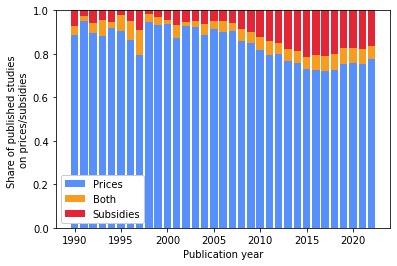

In [64]:
fig, ax = plt.subplots()

rbv = ['#e31a1c','#6a3d9a','#1f78b4']

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)

def plot_prices_subs(df, ax, legend, xlab=True, ylab=True):
    price_share = []
    for name, group in df.query('publication_year>=1990 & publication_year<2023').groupby("publication_year"):
        n = group[(group[prices]>=0.5) | (group[subs]>=0.5)].shape[0]
        if n==0:
            continue
        n_prices = group[(group[prices]>=0.5) & (group[subs]<=0.5)].shape[0]
        ax.bar(
            name, n_prices/n, color="C0", label='Prices' if name==1990 else None
        )
        
        n_both = group[(group[prices]>=0.5) & (group[subs]>=0.5)].shape[0]
        ax.bar(
            name, n_both/n, color="C1", bottom=n_prices/n, label='Both' if name==1990 else None
        )    
        n_sub = group[(group[subs]>=0.5) & (group[prices]<=0.5)].shape[0]
        ax.bar(
            name, n_sub/n, color="C2", bottom=(n_prices+n_both)/n, label='Subsidies' if name==1990 else None
        )
        price_share.append({"py":name,"price_share":n_prices/n})
    ax.set_ylim(0,1)
    if xlab:
        ax.set_xlabel('Publication year')
    if ylab:
        ax.set_ylabel('Share of published studies \non prices/subsidies')
    if legend:
        ax.legend(framealpha=1)
    return pd.DataFrame.from_dict(price_share)

price_share = plot_prices_subs(df, ax, True)
plt.savefig('../figures/price_subsidy.pdf', bbox_inches='tight')

price_share

In [65]:
places.columns

Index(['feature_code', 'feature_class', 'country_code3', 'lat', 'lon', 'name',
       'admin1_code', 'admin1_name', 'admin2_code', 'admin2_name', 'geonameid',
       'admin1_parent_match', 'country_code_parent_match', 'alt_name_length',
       'min_dist', 'max_dist', 'avg_dist', 'ascii_dist', 'adm1_count',
       'country_count', 'score', 'search_name', 'start_char', 'end_char',
       'city_id', 'city_name', 'doc_id', 'country_conf', 'place_name',
       'continent', 'word'],
      dtype='object')

/tmp/ipykernel_211647/1157387813.py:9: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  for name, group in df.query('publication_year>=1990 & publication_year<2023').groupby("publication_year"):
/tmp/ipykernel_211647/1157387813.py:9: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  for name, group in df.query('publication_year>=1990 & publication_year<2023').groupby("publication_year"):
/tmp/ipykernel_211647/1157387813.py:9: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  for name, group in df.query('publication_year>=1990 & publication_year<2023').groupby("publication_year"):
/tmp/ipykernel_211647/1157387813.py:9: RuntimeWarning: Engine has switched to 'python' because numexpr does not 

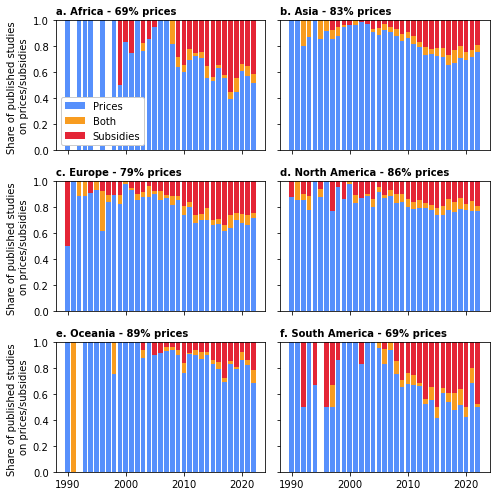

In [66]:
import string
fig, axs = plt.subplots(3,2, figsize=(7,7), sharex=True, sharey=True)
for i, (name, group) in enumerate(places.groupby('continent')):
    ax = axs[i//2,i%2]
    reg_df = df[df['id'].isin(group['doc_id'])]
    n = reg_df[(reg_df[prices]>=0.5) | (reg_df[subs]>=0.5)].shape[0]
    n_prices = reg_df[reg_df[prices]>=0.5].shape[0]
    if i==0:
        legend=True
    else:
        legend=False
    if i//2==3:
        xlab=True
    else:
        xlab=False
    if i%2==0:
        ylab=True
    else:
        ylab=False
    plot_prices_subs(reg_df, ax, legend, xlab=xlab, ylab=ylab)
    ax.set_title(
        f'{string.ascii_lowercase[i]}. {name} - {n_prices/n:.0%} prices',
        loc='left', fontsize=10, fontweight='bold'
    )
    
fig.tight_layout()

plt.savefig('../figures/price_subsidy_region.pdf', bbox_inches='tight')

[Text(0, 0, ' Supranational and international'),
 Text(0, 1, ' National'),
 Text(0, 2, ' Sub-national')]

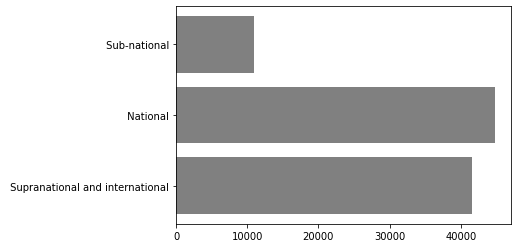

In [67]:
gov_levels = [x for x in df.columns if re.match('^17 -',x)]
fig, ax = plt.subplots()
for i, c in enumerate(gov_levels):
    n = df[df[c]>=0.5].shape[0]
    ax.barh(i, n, color='grey')
    
ax.set_yticks(range(len(gov_levels)))
ax.set_yticklabels([x.split('.')[1] for x in gov_levels])

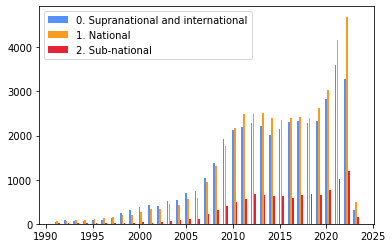

In [68]:
fig, ax = plt.subplots()

n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

totals = np.zeros((n.shape[0],len(gov_levels)))

def count_rel(x):
    return x[x>=0.5].shape[0]

for i,c in enumerate(gov_levels):
    n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
    
    py_index = n.index
    ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
    totals[:,i] = n.values
    
ax.legend()

/tmp/ipykernel_199706/3292937516.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_199706/3292937516.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)


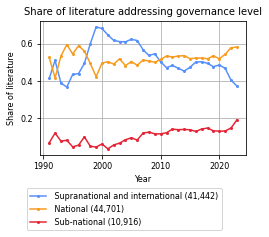

In [69]:
fig, ax = plt.subplots(figsize=(7.4/2,7.4/3))
for i,c in enumerate(gov_levels):
    n = totals[:,i]/totals.sum(axis=1)
    n = totals[:,i]/tdf['id']
    c_sum = int(totals[:,i].sum())
    ax.plot(py_index, n, label=f'{c.split(".")[1]} ({c_sum:,})', marker='o', ms=2)
    
ax.grid()
    
ax.legend(bbox_to_anchor=(0.9,-0.22), fontsize=8)
#ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_title('Share of literature addressing governance level', fontsize=10)
ax.set_xlabel('Year', fontsize=8)
ax.set_ylabel('Share of literature', fontsize=8)

plt.savefig('../figures/govlevel_share.pdf', bbox_inches='tight')

In [70]:
tgdf = pd.DataFrame(totals)
tgdf.columns = gov_levels
tgdf = tgdf.apply(lambda x: x/tgdf.sum(axis=1), axis=0)
tgdf['py'] = np.arange(1991,1991+tgdf.shape[0])
tgdf

,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,py
0,0.410256,0.521368,0.068376,1991
1,0.487179,0.397436,0.115385,1992
2,0.388889,0.533333,0.077778,1993
3,0.351515,0.569697,0.078788,1994
4,0.423469,0.530612,0.045918,1995
5,0.405172,0.543103,0.051724,1996
6,0.428094,0.484950,0.086957,1997
7,0.524008,0.432150,0.043841,1998
8,0.595057,0.365019,0.039924,1999
9,0.549640,0.400000,0.050360,2000


In [116]:
def bar_shares(rows, cols, ax, fs=8, ncol=3):
    
    m = np.zeros((len(rows),len(cols)))
    
    for i, row in enumerate(rows):
        for j, col in enumerate(cols):
            m[i,j] = df[(df[row]>=0.5) & (df[col]>=0.5)].shape[0]
    
    l = 0

    for i, row in enumerate(rows):
        b = 0

        h = df[df[row]>=0.5].shape[0]
        sum_mentions = m[i,:].sum()
        for j, col in enumerate(cols):
            w = m[i,j]/sum_mentions
            ax.bar(
                x=b, bottom=l, height=h, width=w, 
                align="edge", color=f"C{j}", label=col.split()[3] if i==0 else None,
                ec="black"
            )
            if i==len(rows):
                yoffset = 1.13-0.05*(j%3)
                yoffset = 1.03+0.05*(j%2)
                ax.annotate(
                    col.split()[3],
                    (b+w/2,l+h),
                    (b+w/2,(l+h)*yoffset),
                    arrowprops=dict(arrowstyle="->"),
                    ha="center",
                    va="center"
                )
                print(yoffset)
            b+=w
            
        t = row.split(" - ")[1].split(". ")[1].replace('and','&\n')
        ax.text(-.02, l+h/2, t, va="center", ha="right", fontsize=fs)
        ax.text(1.02, l+h/2, f"{h:,.0f}", ha="left", va="center", fontsize=fs)
        l+=h


    ax.legend(bbox_to_anchor=(1.0, -0.05),
              fancybox=True, shadow=True, ncol=ncol, fontsize=fs)
    ax.spines[['right', 'top','bottom']].set_visible(False)
    ax.set_xticks([])
    ax.axis("off")    

        


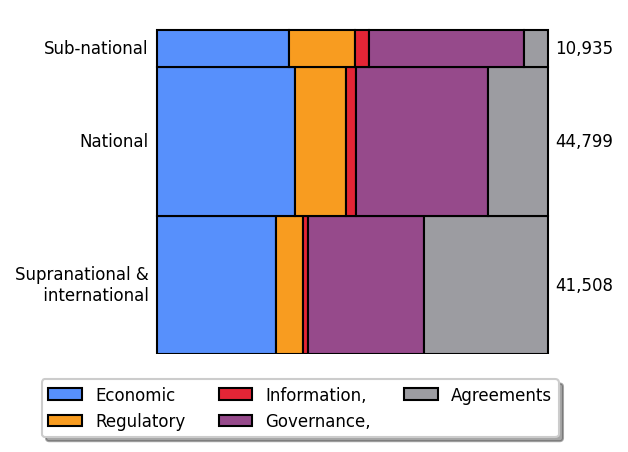

In [112]:

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)

fig, ax = plt.subplots(figsize=(7.4/2,3), dpi=150)

bar_shares(gov_levels, instruments, ax)


plt.savefig("../figures/govlevels_instruments.png", bbox_inches="tight")
plt.savefig("../figures/govlevels_instruments.pdf", bbox_inches="tight")

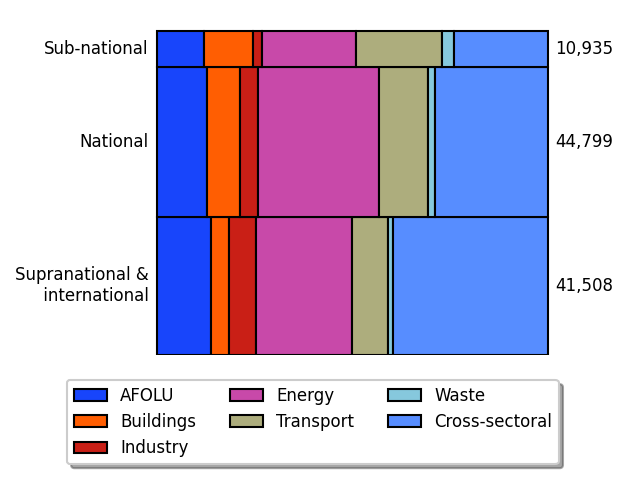

In [113]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_8)

fig, ax = plt.subplots(figsize=(7.4/2,3), dpi=150)
bar_shares(gov_levels, sectors, ax)

plt.savefig("../figures/govlevels_sectors.png", bbox_inches="tight")
plt.savefig("../figures/govlevels_sectors.pdf", bbox_inches="tight")

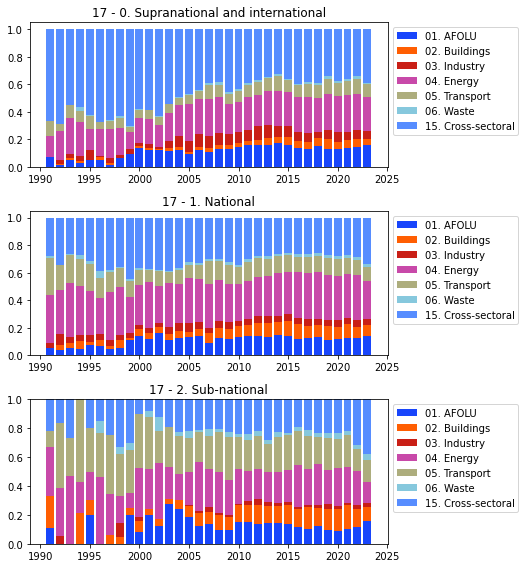

In [73]:
totals = np.zeros((n.shape[0],len(sectors)))

def count_rel(x):
    return x[x>=0.5].shape[0]

fig, axs = plt.subplots(3, figsize=(7.4, 8))

for i, gov in enumerate(gov_levels):
    
    group = df[df[gov]>=0.5]

    ax = axs[i]
    ax.set_title(gov)
    for j,c in enumerate(sectors):
        n = group[group["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
        totals[:,j] = n.values

    bottom = np.zeros(totals.shape[0])
    for j,c in enumerate(sectors):
        n = totals[:,j]/totals.sum(axis=1)
        ax.bar(py_index, n, bottom=bottom, label=c.split(" - ")[1])
        bottom += n

    ax.legend(bbox_to_anchor=(1,1))
    
fig.tight_layout()

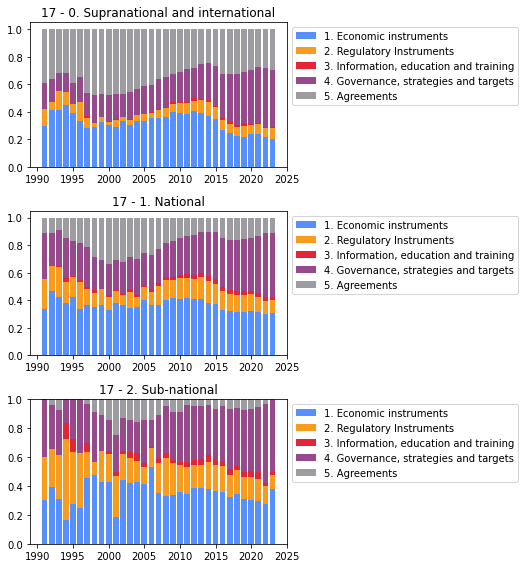

In [74]:
totals = np.zeros((n.shape[0],len(sectors)))

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)

def count_rel(x):
    return x[x>=0.5].shape[0]

fig, axs = plt.subplots(3, figsize=(7.4, 8))

for i, gov in enumerate(gov_levels):
    
    group = df[df[gov]>=0.5]

    ax = axs[i]
    ax.set_title(gov)
    for j,c in enumerate(instruments):
        n = group[group["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
        totals[:,j] = n.values

    bottom = np.zeros(totals.shape[0])
    for j,c in enumerate(instruments):
        n = totals[:,j]/totals.sum(axis=1)
        ax.bar(py_index, n, bottom=bottom, label=c.split(" - ")[1])
        bottom += n

    ax.legend(bbox_to_anchor=(1,1))
    
fig.tight_layout()

In [75]:

ysums = (df
         .query('publication_year>1990')
         .groupby('publication_year')['id']
         .nunique()
        )
ysums

/tmp/ipykernel_199706/318102684.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')


publication_year
1991     116
1992     149
1993     180
1994     158
1995     191
1996     214
1997     259
1998     419
1999     454
2000     561
2001     656
2002     663
2003     850
2004     882
2005    1119
2006    1223
2007    1836
2008    2566
2009    3518
2010    4212
2011    4673
2012    4728
2013    4729
2014    4463
2015    4537
2016    4600
2017    4626
2018    4636
2019    4916
2020    5832
2021    7682
2022    8120
2023     831
Name: id, dtype: int64

/tmp/ipykernel_199706/1804556249.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1804556249.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1804556249.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1804556249.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1804556249.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not

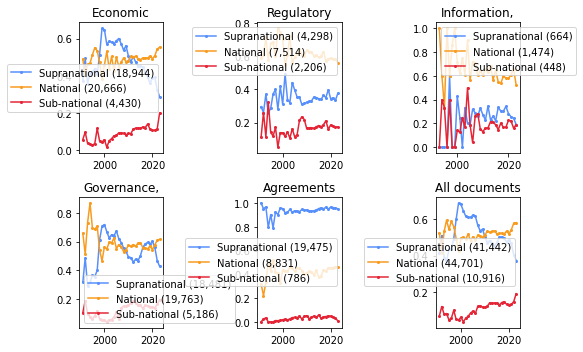

In [76]:

fig, axs = plt.subplots(2,3, figsize=(7,5))

axs = axs.flatten()

totals = np.zeros((n.shape[0],len(gov_levels)))

for i, instrument in enumerate(instruments):
    
    ax = axs[i]
    
    sub_df = df[df[instrument]>=0.5]
    
    ysums = (sub_df
             .query('publication_year>1990')
             .groupby('publication_year')['id']
             .nunique()
            )
    ysums

    n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

    i_totals = np.zeros((n.shape[0],len(gov_levels)))

    def count_rel(x):
        return x[x>=0.5].shape[0]

    for i,c in enumerate(gov_levels):
        n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

        py_index = n.index
        #ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
        i_totals[:,i] = n.values
        
    for i,c in enumerate(gov_levels):
        n = i_totals[:,i]/ysums
        c_sum = int(i_totals[:,i].sum())
        ax.plot(py_index, n, label=f'{c.split(".")[1].split()[0]} ({c_sum:,})', marker='o', ms=2)

    ax.legend()
    ax.set_title(instrument.split('.')[1].split()[0])
    
ax = axs[-1]

ysums = (df
         .query('publication_year>1990')
         .groupby('publication_year')['id']
         .nunique()
        )
ysums

for i,c in enumerate(gov_levels):
    n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
    totals[:,i] = n.values

for i,c in enumerate(gov_levels):
    n = totals[:,i]/ysums
    c_sum = int(totals[:,i].sum())
    ax.plot(py_index, n, label=f'{c.split(".")[1].split()[0]} ({c_sum:,})', marker='o', ms=2)
    
ax.legend()
ax.set_title('All documents')


fig.tight_layout()

plt.savefig('../figures/govlevel_share.pdf', bbox_inches='tight')


/tmp/ipykernel_199706/1794184639.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1794184639.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1794184639.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1794184639.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/1794184639.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not

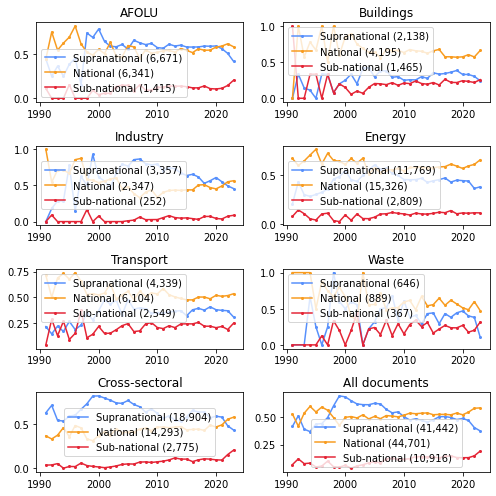

In [77]:

fig, axs = plt.subplots(4,2, figsize=(7,7))

axs = axs.flatten()



for i, instrument in enumerate(sectors):
    
    ax = axs[i]
    
    sub_df = df[df[instrument]>=0.5]
    
    ysums = (sub_df
             .query('publication_year>1990')
             .groupby('publication_year')['id']
             .nunique()
            )
    ysums

    n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

    i_totals = np.zeros((n.shape[0],len(gov_levels)))

    def count_rel(x):
        return x[x>=0.5].shape[0]

    for i,c in enumerate(gov_levels):
        n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

        py_index = n.index
        #ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
        i_totals[:,i] = n.values
        
    for i,c in enumerate(gov_levels):
        n = i_totals[:,i]/ysums
        c_sum = int(i_totals[:,i].sum())
        ax.plot(py_index, n, label=f'{c.split(".")[1].split()[0]} ({c_sum:,})', marker='o', ms=2)

    ax.legend()
    ax.set_title(instrument.split('.')[1].split()[0])
    
ax = axs[-1]

ysums = (df
         .query('publication_year>1990')
         .groupby('publication_year')['id']
         .nunique()
        )
ysums

totals = np.zeros((ysums.index.shape[0],len(gov_levels)))

for i,c in enumerate(gov_levels):
    n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
    totals[:,i] = n.values

for i,c in enumerate(gov_levels):
    n = totals[:,i]/ysums
    c_sum = int(totals[:,i].sum())
    ax.plot(py_index, n, label=f'{c.split(".")[1].split()[0]} ({c_sum:,})', marker='o', ms=2)
    
ax.legend()
ax.set_title('All documents')


fig.tight_layout()

plt.savefig('../figures/govlevel_share.pdf', bbox_inches='tight')


In [78]:
2//2

1

/tmp/ipykernel_199706/2517230249.py:23: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/2517230249.py:23: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/2517230249.py:23: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/2517230249.py:23: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_199706/2517230249.py:23: RuntimeWarning: Engine has switched to 'python' because numexpr does not

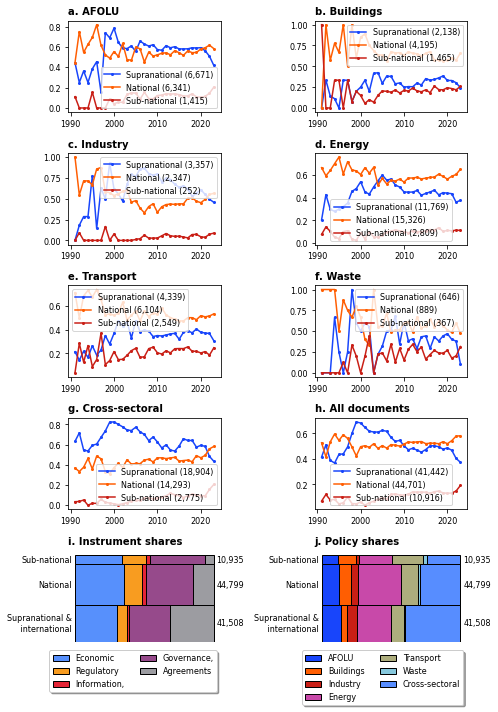

In [130]:
import string
## SI FIgure 3

import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


fig = plt.figure(tight_layout=True, figsize=(7,10))
gs = gridspec.GridSpec(5, 2)


for i, instrument in enumerate(sectors):
    
    row = i // 2
    col = i % 2
    ax = fig.add_subplot(gs[row,col])
    
    sub_df = df[df[instrument]>=0.5]
    
    ysums = (sub_df
             .query('publication_year>1990')
             .groupby('publication_year')['id']
             .nunique()
            )
    ysums

    n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

    i_totals = np.zeros((n.shape[0],len(gov_levels)))

    def count_rel(x):
        return x[x>=0.5].shape[0]

    for j,c in enumerate(gov_levels):
        n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

        py_index = n.index
        #ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
        i_totals[:,j] = n.values
        
    for j,c in enumerate(gov_levels):
        n = i_totals[:,j]/ysums
        c_sum = int(i_totals[:,j].sum())
        ax.plot(py_index, n, label=f'{c.split(".")[1].split()[0]} ({c_sum:,})', marker='o', ms=2)

    ax.legend(fontsize=label_size)
    t = f'{string.ascii_lowercase[i]}. {instrument.split(".")[1].split()[0]}'
    ax.set_title(t, loc='left', fontsize=ts, fontweight='bold')

i += 1
row = i // 2
col = i % 2
    
ax = fig.add_subplot(gs[row,col])

ysums = (df
         .query('publication_year>1990')
         .groupby('publication_year')['id']
         .nunique()
        )
ysums

totals = np.zeros((ysums.index.shape[0],len(gov_levels)))

for j,c in enumerate(gov_levels):
    n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
    totals[:,j] = n.values

for j,c in enumerate(gov_levels):
    n = totals[:,j]/ysums
    c_sum = int(totals[:,j].sum())
    ax.plot(py_index, n, label=f'{c.split(".")[1].split()[0]} ({c_sum:,})', marker='o', ms=2)
    
ax.legend(fontsize=label_size)
ax.set_title('h. All documents', fontsize=ts, loc='left', fontweight='bold')

ax = fig.add_subplot(gs[4,0])
mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_colors)
bar_shares(gov_levels, instruments, ax, ncol=2)
ax.set_title('i. Instrument shares', fontsize=ts, loc='left', fontweight='bold')

ax = fig.add_subplot(gs[4,1])
mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_8)
bar_shares(gov_levels, sectors, ax, ncol=2)
ax.set_title('j. Policy shares', fontsize=ts, loc='left', fontweight='bold')

fig.tight_layout()

plt.savefig('../figures/SI_Figure_3.pdf', bbox_inches='tight')


['19 - 0. Ex-post', '19 - 1. Ex-ante']


[Text(0, 0, ' Ex-post'), Text(0, 1, ' Ex-ante')]

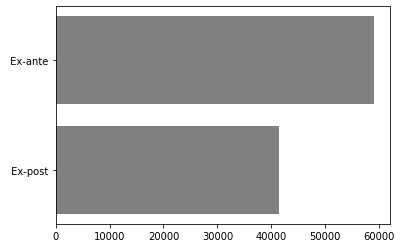

In [78]:
ev_types = [x for x in df.columns if re.match('^19 -',x)]
print(ev_types)
fig, ax = plt.subplots()
for i, c in enumerate(ev_types):
    n = df[df[c]>=0.5].shape[0]
    ax.barh(i, n, color='grey')
    
ax.set_yticks(range(len(ev_types)))
ax.set_yticklabels([x.split('.')[1] for x in ev_types])

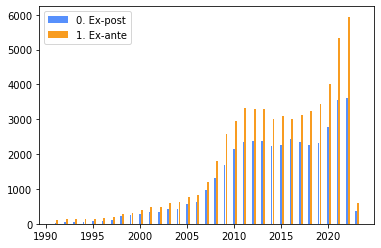

In [79]:
fig, ax = plt.subplots()

n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

totals = np.zeros((n.shape[0],len(ev_types)))

def count_rel(x):
    return x[x>=0.5].shape[0]

for i,c in enumerate(ev_types):
    n = df[df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)
    
    py_index = n.index
    ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
    totals[:,i] = n.values
    
ax.legend()

In [80]:
ysums = (df
         .query('publication_year>1990')
         .groupby('publication_year')['id']
         .nunique()
        )
ysums

/tmp/ipykernel_185644/2468222950.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')


publication_year
1991     116
1992     149
1993     180
1994     158
1995     191
1996     214
1997     259
1998     419
1999     454
2000     561
2001     656
2002     663
2003     850
2004     882
2005    1119
2006    1223
2007    1836
2008    2566
2009    3518
2010    4212
2011    4673
2012    4728
2013    4729
2014    4463
2015    4537
2016    4600
2017    4626
2018    4636
2019    4916
2020    5832
2021    7682
2022    8120
2023     831
Name: id, dtype: int64

/tmp/ipykernel_185644/3332494997.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_185644/3332494997.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)


Text(0, 0.5, 'Share of literature')

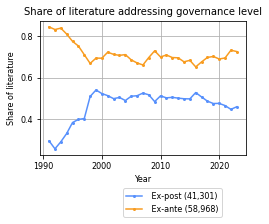

In [81]:
fig, ax = plt.subplots(figsize=(7.4/2,7.4/3))
for i,c in enumerate(ev_types):
    n = totals[:,i]/totals.sum(axis=1)
    n = totals[:,i]/ysums
    c_sum = int(totals[:,i].sum())
    ax.plot(py_index, n, label=f'{c.split(".")[1]} ({c_sum:,})', marker='o', ms=2)
    
ax.grid()
    
ax.legend(bbox_to_anchor=(0.9,-0.22), fontsize=8)
#ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_title('Share of literature addressing governance level', fontsize=10)
ax.set_xlabel('Year', fontsize=8)
ax.set_ylabel('Share of literature', fontsize=8)

#plt.savefig('../figures/evtype_share.pdf', bbox_inches='tight')

'a'

/tmp/ipykernel_185644/1763638934.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_185644/1763638934.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_185644/1763638934.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_185644/1763638934.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('publication_year>1990')
/tmp/ipykernel_185644/1763638934.py:14: RuntimeWarning: Engine has switched to 'python' because numexpr does not

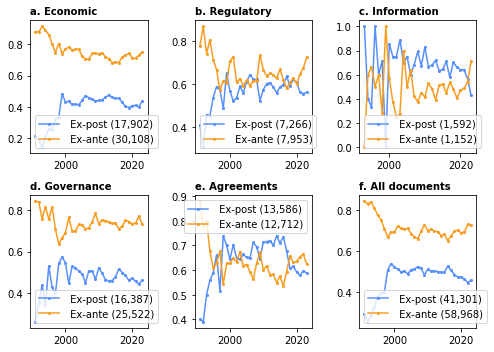

In [93]:
import string
fig, axs = plt.subplots(2,3, figsize=(7,5))

axs = axs.flatten()


for i, instrument in enumerate(instruments):
    
    ax = axs[i]
    
    sub_df = df[df[instrument]>=0.5]
    
    ysums = (sub_df
             .query('publication_year>1990')
             .groupby('publication_year')['id']
             .nunique()
            )
    ysums

    n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

    i_totals = np.zeros((n.shape[0],len(ev_types)))
    
    t = instrument.split('.')[1].split()[0].split(',')[0]
    t = f'{string.ascii_lowercase[i]}. {t}'
    
    def count_rel(x):
        return x[x>=0.5].shape[0]

    for i,c in enumerate(ev_types):
        n = sub_df[sub_df["publication_year"]>1990].groupby("publication_year")[c].agg(count_rel)

        py_index = n.index
        #ax.bar(n.index+i*0.2, n, label=c.split(" - ")[1],width=0.18)
        i_totals[:,i] = n.values
        
        
    for i,c in enumerate(ev_types):
        n = i_totals[:,i]/ysums
        c_sum = int(i_totals[:,i].sum())
        ax.plot(py_index, n, label=f'{c.split(".")[1]} ({c_sum:,})', marker='o', ms=2)

    ax.legend()

    ax.set_title(t, loc='left', fontsize=ts, fontweight='bold')
    
ax = axs[-1]

ysums = (df
         .query('publication_year>1990')
         .groupby('publication_year')['id']
         .nunique()
        )
ysums

for i,c in enumerate(ev_types):
    n = totals[:,i]/ysums
    c_sum = int(totals[:,i].sum())
    ax.plot(py_index, n, label=f'{c.split(".")[1]} ({c_sum:,})', marker='o', ms=2)
    
ax.legend()
ax.set_title(f'{string.ascii_lowercase[len(instruments)]}. All documents', 
             loc='left', fontsize=ts, fontweight='bold')


fig.tight_layout()

plt.savefig('../figures/evtype_share.pdf', bbox_inches='tight')


In [129]:
np.exp(0)

1.0

In [130]:
np.exp(0.5)

1.6487212707001282

In [131]:
np.exp(1)

2.718281828459045

In [132]:
0.1*0.9

0.09000000000000001

In [133]:
0.5*0.5

0.25